# Tâche 6: Etude de symétrie

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.core.operations import SymmOp

# Clé API MP
with MPRester("1ziZTLbVkqHKwpma") as m:
    # Structure du matériau mp-7575
    structure = m.get_structure_by_material_id("mp-7575")

struct_an = SpacegroupAnalyzer(structure)
struct_c = struct_an.get_conventional_standard_structure()#structure conventionnelle
struct_c_an = SpacegroupAnalyzer(struct_c)

Comme dans le document lattice.ipynb, l'étude concerne la maille conventionnelle.

In [2]:
# Opérations de symétrie
symOps = struct_c_an.get_symmetry_operations()
sym1 = symOps[9-1]#C3 (z x y)
sym2 = symOps[6-1]#Mirror (y x z)
sym3 = symOps[30-1]#n-glide plane (y+1/2 x+1/2 z) (1/2 1/2 0)

#Sites atomiques
atoms = struct_c.sites 
Li_i = atoms[1-1].frac_coords #1 (25 25 75)
Zn_i = atoms[5-1].frac_coords #5 (25 75 75)
N_i = atoms[11-1].frac_coords #11 (50 0 50)

# Application des opérations de symétrie
Li_f = sym1.operate(Li_i)
Zn_f = sym2.operate(Zn_i)
N_f = sym3.operate(N_i)

## Opération 1: rotation C3 sur l'atome 1 (Li)

In [3]:
print("Possition de départ : ", Li_i)
print("\nOpération : ", sym1)
print("\nPosition d'arivée : ", Li_f)

Possition de départ :  [0.25 0.25 0.75]

Opération :  Rot:
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]
tau
[0. 0. 0.]

Position d'arivée :  [0.75 0.25 0.25]


L'élement de symétrie 9 du LiZnN est un axe de rotation d'ordre 3 d'orientation [1 1 1]. Sa composante translatoire est nul.

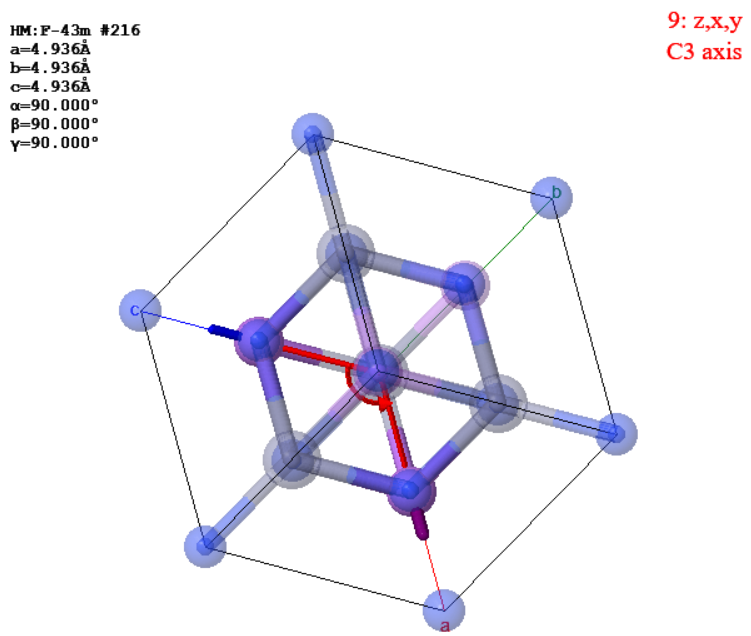

## Opération 2: reflexion m sur l'atome 5 (Zn)

In [4]:
print("Possition de départ : ", Zn_i)
print("\nOpération : ", sym2)
print("\nPosition d'arivée : ", Zn_f)

Possition de départ :  [0.25 0.25 0.25]

Opération :  Rot:
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
tau
[0. 0. 0.]

Position d'arivée :  [0.25 0.25 0.25]


L'élement de symétrie 6 du LiZnN est un plan miroir perpendiculair à [1 -1 0]. Sa composante translatoire est nul.

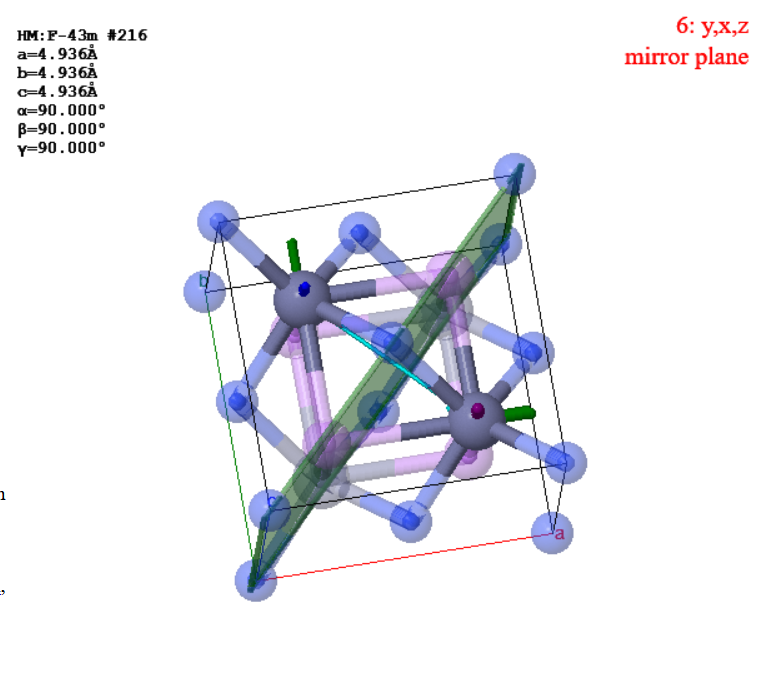

## Opération 3: reflexion avec glissement n sur l'atome 11 (N)

In [5]:
print("Possition de départ : ", N_i)
print("\nOpération : ", sym3)
print("\nPosition d'arivée : ", N_f)

Possition de départ :  [0.5 0.  0.5]

Opération :  Rot:
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
tau
[0.5 0.5 0. ]

Position d'arivée :  [0.5 1.  0.5]


L'élement de symétrie 30 du LiZnN est un plan de glissement perpendiculair à [1 -1 0] avec un glissement n dans la direction [1 1 0]. Sa composante translatoire est [0.5 0.5 0].

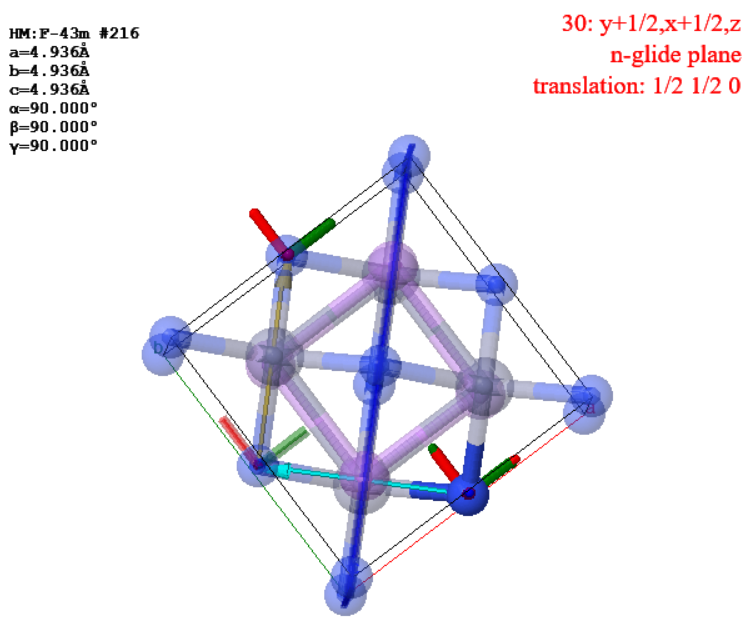

Images génerées sur www.pslc.ws/jsmol/jcse/explore.htm.